# Domanda 7

Discutere l’approssimazione a m dati equispaziati ottenuti campionando la funzione $f(x)=\sin(x) + \cos(x)$ nell’intervallo $[0, 2π]$ usando polinomi di grado $n\in\{1, 2, 3, 5, 7\}$.

Si risolva il problema dei minimi quadrati sia mediante le equazioni normali che con SVD, calcolando l’errore
di approssimazione in norma 2 per entrambi i metodi. 

Infine graficare le approssimazioni polinomiali ottenute.

Soluzione equazioni normali =  [0.81841717 0.88996606] 

Errore equazioni normali =  0.598229159547645 

Soluzione SVD =  [0.81841717 0.88996606] 

Errore svd =  0.598229159547645 



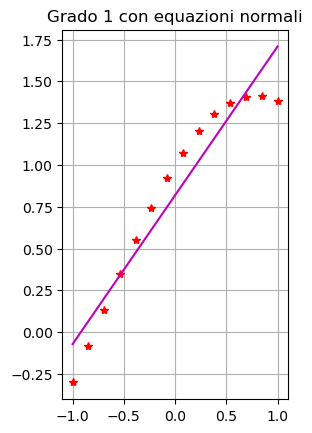

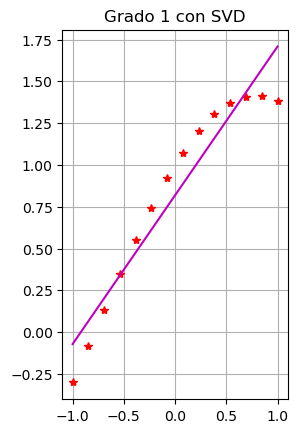

Soluzione equazioni normali =  [ 0.99562554  0.88996606 -0.46074176] 

Errore equazioni normali =  0.10759946582040017 

Soluzione SVD =  [ 0.99562554  0.88996606 -0.46074176] 

Errore svd =  0.10759946582040006 



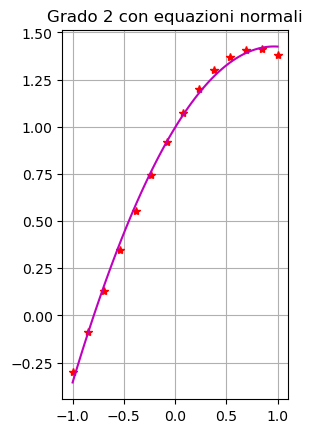

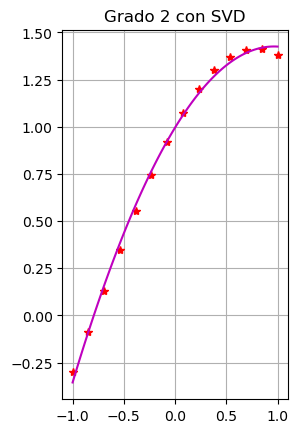

Soluzione equazioni normali =  [ 0.99562554  0.99761912 -0.46074176 -0.15656943] 

Errore equazioni normali =  0.014115368274101725 

Soluzione SVD =  [ 0.99562554  0.99761912 -0.46074176 -0.15656943] 

Errore svd =  0.014115368274101578 



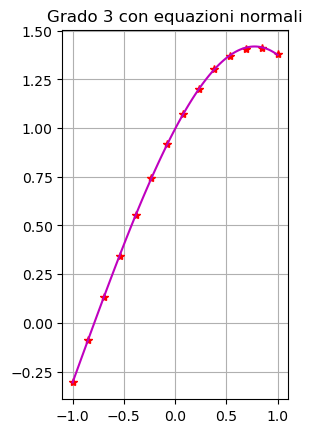

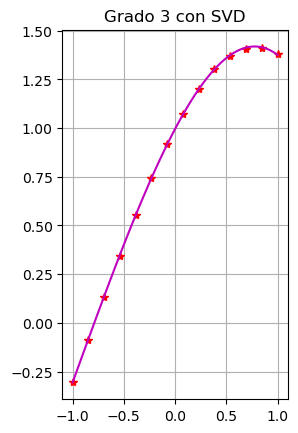

Soluzione equazioni normali =  [ 0.99996235  0.99998099 -0.49926541 -0.16650389  0.03962911  0.00799487] 

Errore equazioni normali =  0.00011753735365559278 

Soluzione SVD =  [ 0.99996235  0.99998099 -0.49926541 -0.16650389  0.03962911  0.00799487] 

Errore svd =  0.00011753735365546313 



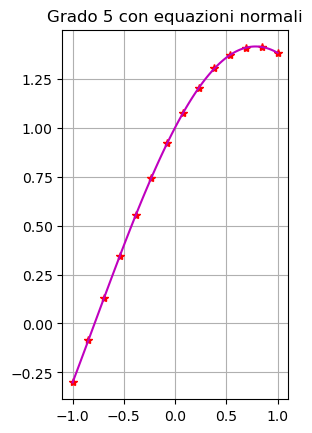

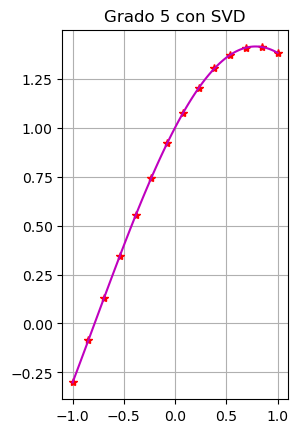

Soluzione equazioni normali =  [ 9.99999852e-01  9.99999931e-01 -4.99994733e-01 -1.66665635e-01
  4.16382937e-02  8.32925068e-03 -1.34113770e-03 -1.92563302e-04] 

Errore equazioni normali =  4.3793106329094533e-07 

Soluzione SVD =  [ 9.99999852e-01  9.99999931e-01 -4.99994733e-01 -1.66665635e-01
  4.16382937e-02  8.32925068e-03 -1.34113770e-03 -1.92563301e-04] 

Errore svd =  4.379310630776981e-07 



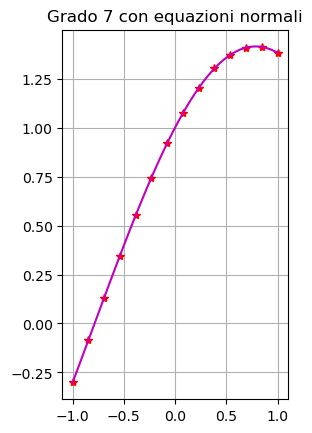

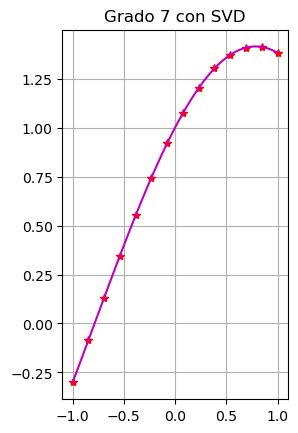

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg


m = 14
x = np.linspace(-1, 1, m)
y = np.sin(x) + np.cos(x)
degree_pol = np.array((1, 2, 3, 5, 7))

for n in degree_pol:
    A = np.zeros((m, n+1))
    for i in range(n+1):
        A[:, i] = x**i
        
    U, s , Vh = scipy.linalg.svd(A)
    x_svd = np.zeros(n+1)
    
    ATA = np.matmul(A.T, A)
    ATy = np.matmul(A.T, y)
    
    lu, piv = scipy.linalg.lu_factor(ATA)
    x_eqnorm = scipy.linalg.lu_solve((lu, piv), ATy)
    print("Soluzione equazioni normali = ", x_eqnorm, '\n')
    
    res_eqnorm = np.linalg.norm(A @ x_eqnorm - y)
    print("Errore equazioni normali = ", res_eqnorm, '\n')
    
    for i in range(n+1):
        ui = U[:, i]
        vi = Vh[i, :]
        
        x_svd = x_svd + (np.dot(ui.T, y) *vi) / s[i]
        
    print("Soluzione SVD = ", x_svd, '\n')
        
    res_svd = np.linalg.norm(A @ x_svd - y)
    print("Errore svd = ", res_svd, '\n')
        
    m_plot = 100
    x_plot = np.linspace(x[0], x[-1], m_plot)
    A_plot = np.zeros((m_plot, n+1))
        
    for i in range(n+1):
        A_plot[:, i] = x_plot ** i
            
    y_eqnorm = A_plot @ x_eqnorm
    
    
    fig1 = plt.subplot(1, 2, 1)
    plt.title(f"Grado {n} con equazioni normali")
    plt.plot(x, y, '*r')
    plt.plot(x_plot, y_eqnorm, 'm')
    plt.grid()
        
    plt.show()
        
        
    y_svd = A_plot @ x_svd
        
    fig2 = plt.subplot(1, 2, 2)
    plt.title(f"Grado {n} con SVD")
    plt.plot(x, y, '*r')
    plt.plot(x_plot, y_svd, 'm')
    plt.grid()
        
    plt.show()